# Fashion_MNIST Classification

In [1]:
!pip install tensorflow-datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

/Users/yaninalubenska/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Getting to know the data.**

In [4]:
print(f'The size of the training set: {train_images.shape}')
print(f'The size of the training labels: {train_labels.shape}')
print(f'The size of the test set: {test_images.shape}')
print(f'The size of the test labels: {test_labels.shape}')

The size of the training set: (60000, 28, 28)
The size of the training labels: (60000,)
The size of the test set: (10000, 28, 28)
The size of the test labels: (10000,)


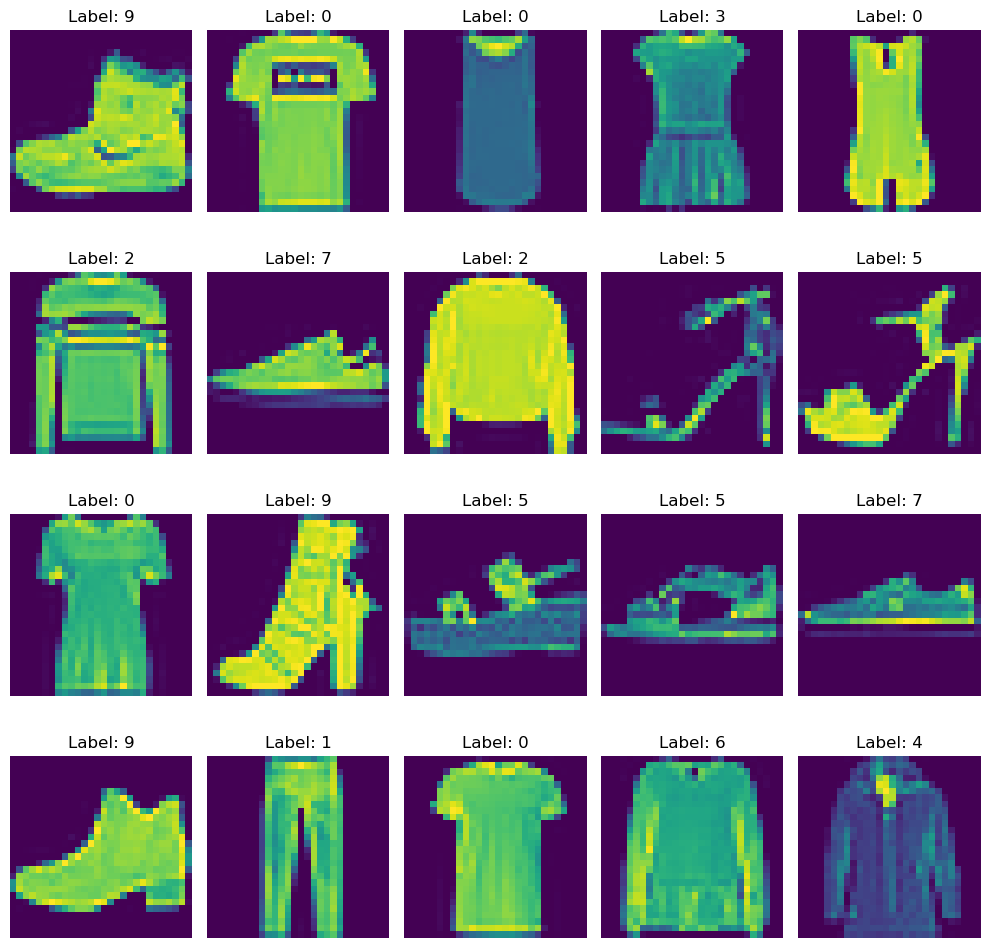

In [5]:
train_images_with_channel = np.expand_dims(train_images, axis=-1)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = tf.keras.preprocessing.image.array_to_img(train_images_with_channel[i])
    ax.imshow(img)
    ax.set_title(f'Label: {train_labels[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

The list of labels:
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot


**Data preparation**

In [6]:
# Add channel dimension 
test_images_with_channel = np.expand_dims(test_images, axis=-1)

# Rescale images
train_images_with_channel = train_images_with_channel / 255.0
test_images_with_channel = test_images_with_channel / 255.0

print(f'New training set shape: {train_images_with_channel.shape}')
print(f'New test set shape: {test_images_with_channel.shape}')

# Convert labels to binary class matrices
num_classes = len(np.unique(train_labels))
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

New training set shape: (60000, 28, 28, 1)
New test set shape: (10000, 28, 28, 1)


In [7]:
for i in range(10):
    print(train_labels[i])
train_labels.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


(60000, 10)

## CNN

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [487]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(input_shape),
        
        keras.layers.Conv2D(84, kernel_size=(3, 3), activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(1, 1)),
        
        keras.layers.Conv2D(104, kernel_size=(3, 3), activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(10, activation='linear')
    ]
)

model.summary()

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 84)        840       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 84)       336       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 84)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 104)       78728     
                                                                 
 batch_normalization_3 (Batc  (None, 24, 24, 104)      416       
 hNormalization)                                                 
                                                     

In [492]:
batch_size = 128
epochs = 20
checkpoint_filepath = 'best_weights.h5'

early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(learning_rate=0.001, weight_decay=1e-6), metrics=["accuracy"])

history = model.fit(train_images_with_channel, train_labels, epochs=epochs, callbacks=[early_stop, checkpoint_callback], 
                    validation_split=0.2, batch_size=batch_size)

Epoch 1/20
375/375 [==============================] - ETA: 0s - loss: 0.4140 - accuracy: 0.8544
Epoch 1: val_accuracy improved from -inf to 0.58650, saving model to best_weights.h5
375/375 [==============================] - 56s 148ms/step - loss: 0.4140 - accuracy: 0.8544 - val_loss: 2.9472 - val_accuracy: 0.5865
Epoch 2/20
375/375 [==============================] - ETA: 0s - loss: 0.2917 - accuracy: 0.8957
Epoch 2: val_accuracy improved from 0.58650 to 0.90367, saving model to best_weights.h5
375/375 [==============================] - 55s 148ms/step - loss: 0.2917 - accuracy: 0.8957 - val_loss: 0.2741 - val_accuracy: 0.9037
Epoch 3/20
375/375 [==============================] - ETA: 0s - loss: 0.2490 - accuracy: 0.9086
Epoch 3: val_accuracy improved from 0.90367 to 0.90475, saving model to best_weights.h5
375/375 [==============================] - 55s 148ms/step - loss: 0.2490 - accuracy: 0.9086 - val_loss: 0.2633 - val_accuracy: 0.9047
Epoch 4/20
375/375 [=============================

In [493]:
def plot_learning_curves(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    
    
def plot_accuracy_curves(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()


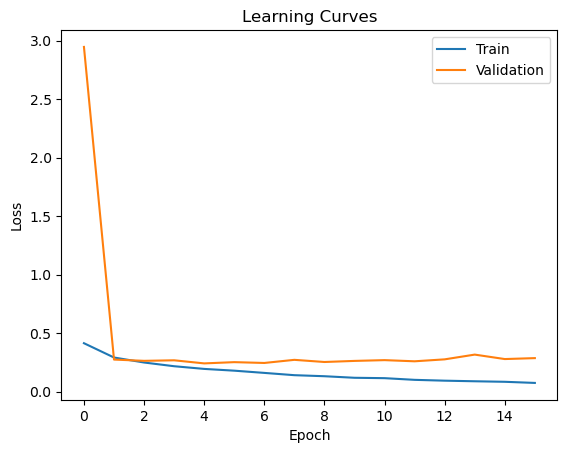

In [494]:
plot_learning_curves(history)

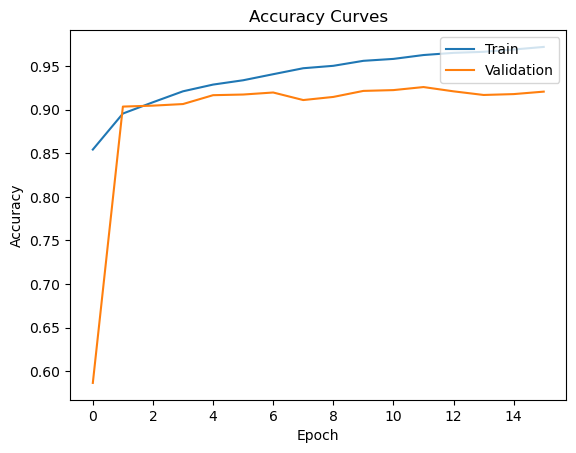

In [495]:
plot_accuracy_curves(history)

There is no sign of overfitting in the learning and accuracy curves.

Let's check if the model generalizes to the new data well.

In [496]:
model.load_weights('best_weights.h5')

test_logits = model.predict(test_images_with_channel)
test_predictions = tf.nn.softmax(test_logits)

loss, accuracy = model.evaluate(test_images_with_channel, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 3s 11ms/step - loss: 0.2749 - accuracy: 0.9206
Test loss: 0.2749440371990204
Test accuracy: 0.9205999970436096


92% of accuracy is not bad. 

Let's see which examples we missclassify.

In [15]:
def plot_image(i, predictions, true_label, img):
    true_label, img = np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap='gray')
    
    predicted_label = np.argmax(predictions)

    plt.xlabel(f'Pred: {predicted_label}, {round(100*np.max(predictions), 1)}%, true: {true_label}. {predicted_label == true_label}')

    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

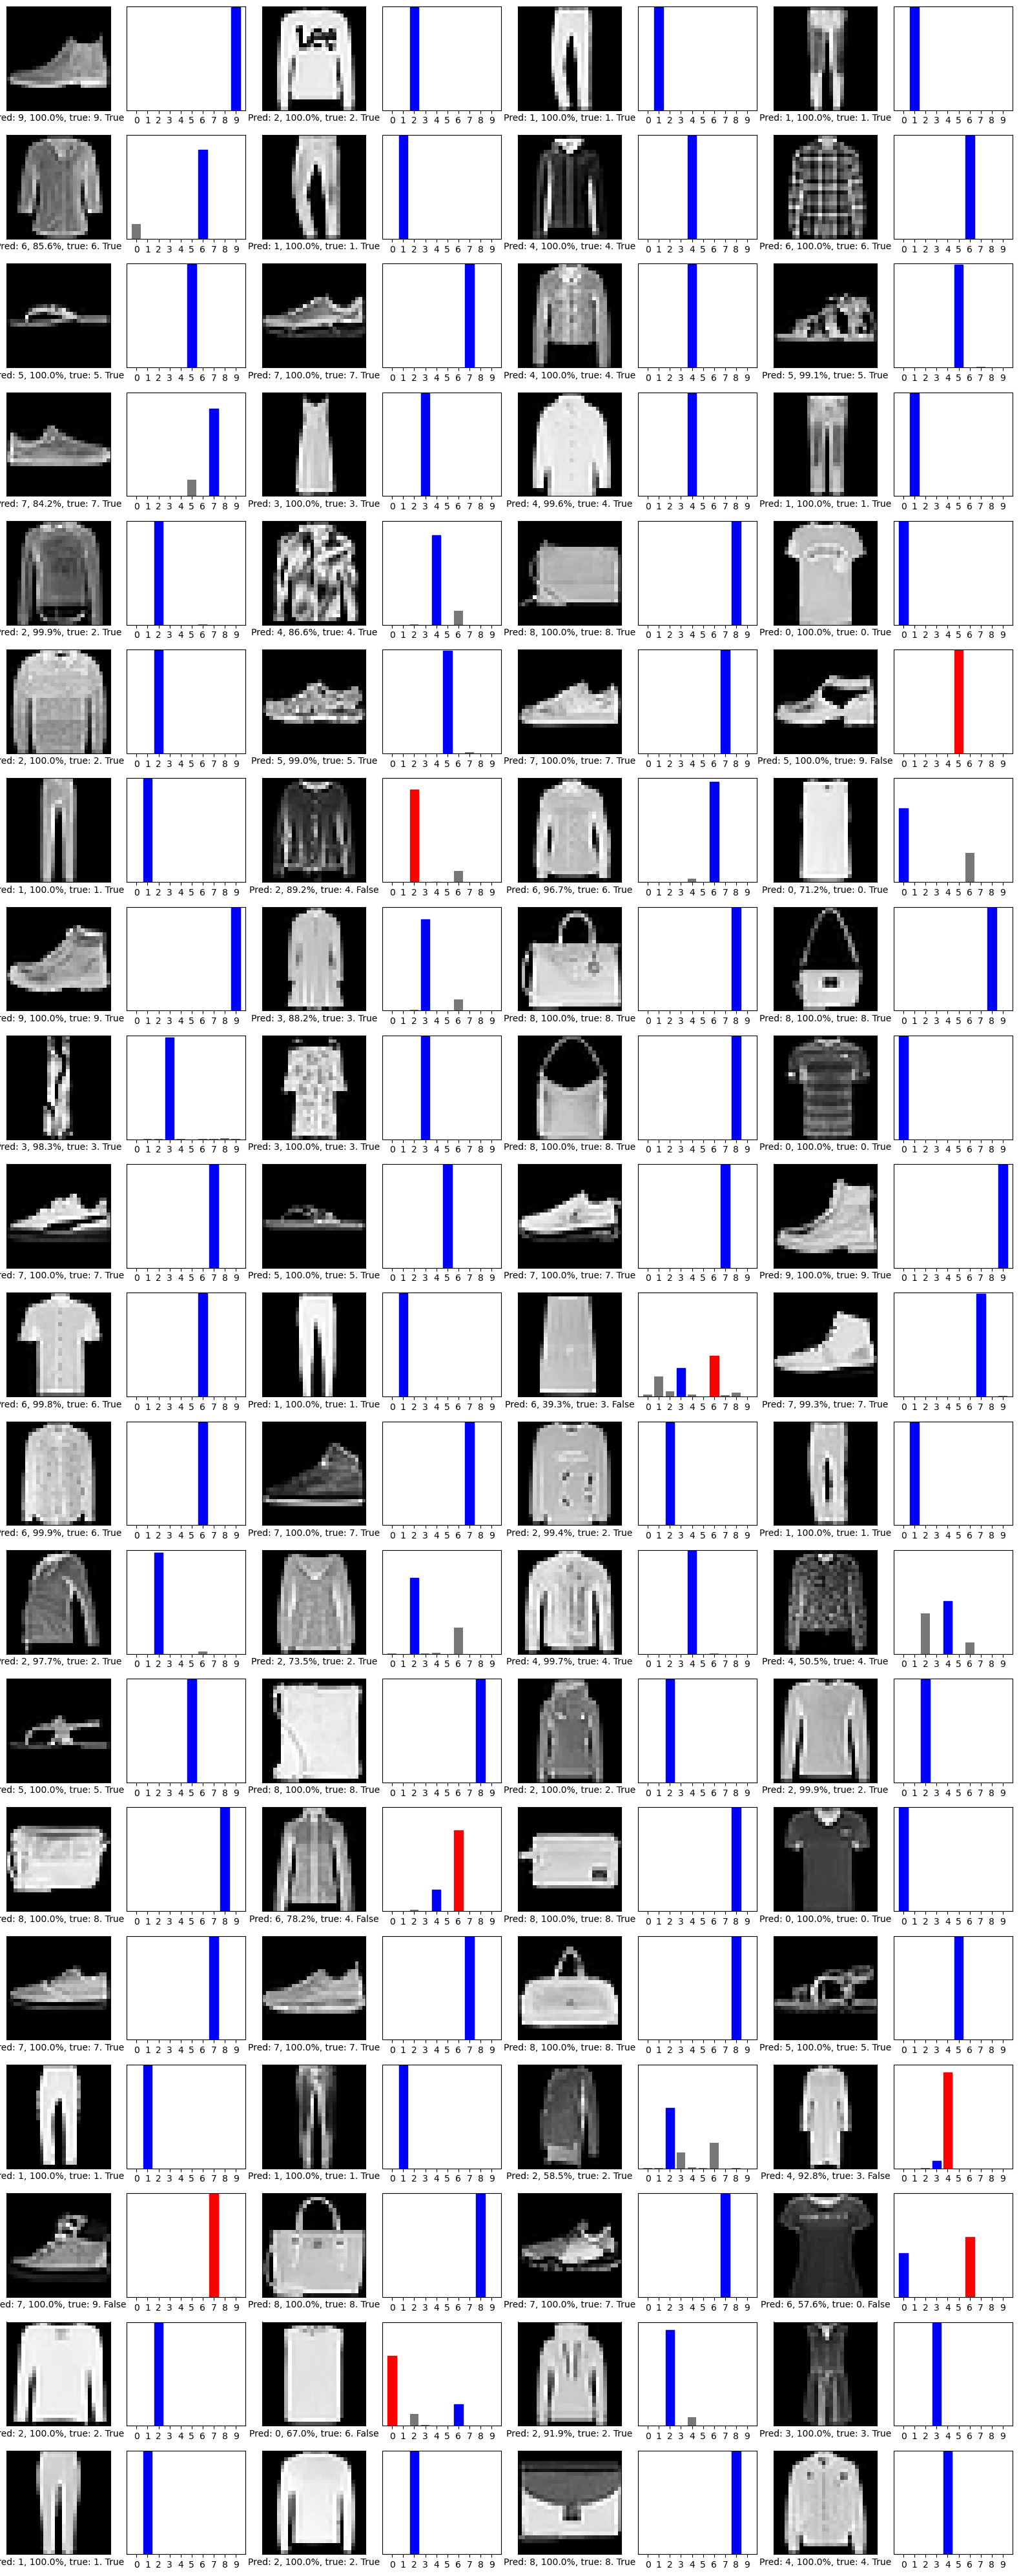

In [24]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, test_predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, test_predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Densely Connected NN

In [478]:
np.random.seed(42)
tf.random.set_seed(42)

dense_model = keras.Sequential(
    [
        keras.layers.Input(input_shape),
        
        keras.layers.Lambda(lambda x: tf.image.sobel_edges(x)),
        keras.layers.Reshape((-1, 2)),
        keras.layers.Flatten(),
        
        keras.layers.Dense(1024, activation='relu'), 
        keras.layers.Dropout(0.4),
        
        keras.layers.Dense(256, activation='relu'), 
        keras.layers.Dropout(0.3),
    
        keras.layers.Dense(num_classes, activation='linear')
    ]
)

dense_model.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_73 (Lambda)          (None, 28, 28, 1, 2)      0         
                                                                 
 reshape_72 (Reshape)        (None, 784, 2)            0         
                                                                 
 flatten_85 (Flatten)        (None, 1568)              0         
                                                                 
 dense_288 (Dense)           (None, 1024)              1606656   
                                                                 
 dropout_144 (Dropout)       (None, 1024)              0         
                                                                 
 dense_289 (Dense)           (None, 256)               262400    
                                                                 
 dropout_145 (Dropout)       (None, 256)             

In [479]:
dense_batch_size = 2048
dense_epochs = 35
checkpoint2_filepath = 'best_weights_dense.h5'

checkpoint_callback_dense = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint2_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1)

dense_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

dense_history = dense_model.fit(train_images_with_channel, train_labels, epochs=dense_epochs, callbacks=[early_stop, checkpoint_callback_dense], 
                    validation_split=0.2, batch_size=dense_batch_size)

Epoch 1/35
23/24 [===========================>..] - ETA: 0s - loss: 0.7679 - accuracy: 0.7429
Epoch 1: val_accuracy improved from -inf to 0.85183, saving model to best_weights_dense.h5
24/24 [==============================] - 2s 65ms/step - loss: 0.7636 - accuracy: 0.7441 - val_loss: 0.4279 - val_accuracy: 0.8518
Epoch 2/35
23/24 [===========================>..] - ETA: 0s - loss: 0.4254 - accuracy: 0.8496
Epoch 2: val_accuracy improved from 0.85183 to 0.86967, saving model to best_weights_dense.h5
24/24 [==============================] - 1s 62ms/step - loss: 0.4243 - accuracy: 0.8500 - val_loss: 0.3639 - val_accuracy: 0.8697
Epoch 3/35
23/24 [===========================>..] - ETA: 0s - loss: 0.3597 - accuracy: 0.8703
Epoch 3: val_accuracy improved from 0.86967 to 0.88125, saving model to best_weights_dense.h5
24/24 [==============================] - 1s 62ms/step - loss: 0.3591 - accuracy: 0.8708 - val_loss: 0.3336 - val_accuracy: 0.8813
Epoch 4/35
23/24 [===========================>..]

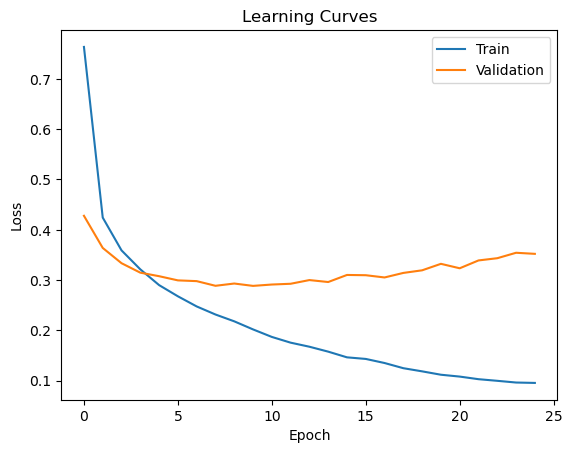

In [480]:
plot_learning_curves(dense_history)

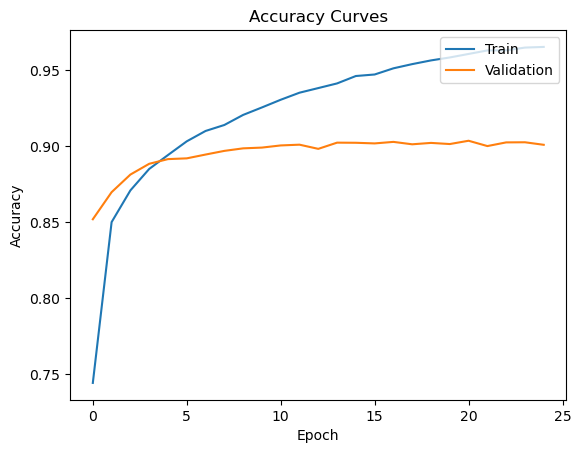

In [481]:
plot_accuracy_curves(dense_history)

In [482]:
dense_model.load_weights('best_weights_dense.h5')

dense_test_logits = dense_model.predict(test_images_with_channel)
dense_test_predictions = tf.nn.softmax(dense_test_logits)

loss, accuracy = dense_model.evaluate(test_images_with_channel, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3540 - accuracy: 0.8995
Test loss: 0.3539879024028778
Test accuracy: 0.8995000123977661


A densely connected feedforward NN is not a good fit for this type of tasks. It cannot reach more than 89% accuracy on the test set, no matter how big the network is. Consequently, a convolutional NN is a much better option for this problem. 